## Visualizing particle in a box 

The particle-in-a-box is one of the simplest systems for which we can solve the Schrodinger equation analytically. However, it is also one of the simplest systems which demonstrates some of the peculiarities of quantum mechanics, including energy quantization and wavefunction nodes.

### System set-up

Our system of interest is a particle of mass $m$, moving in a 1-dimensional box of length $L$. The potential energy inside the box is zero, and outside we can assume that it goes to infinite. As a result, the particle is confined to the range $(0,L)$ on the $x$-axis.

In [3]:
# First load the libs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# a and load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

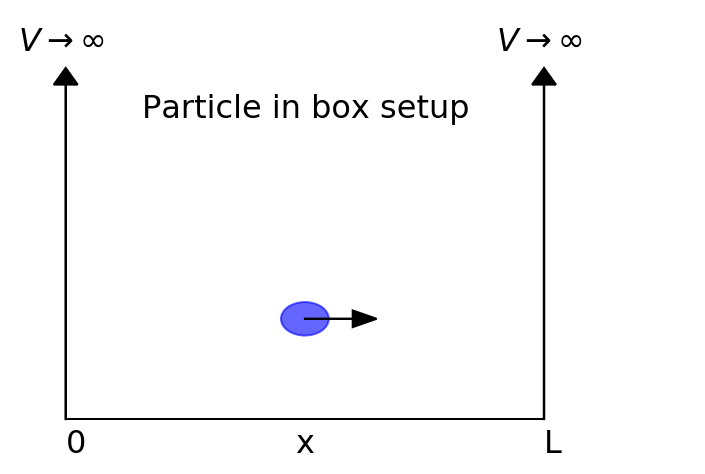

In [8]:
ax = plt.axes()
ax.arrow(0, 0, 1.0, 0.0, head_width=0.0, head_length=0.0, fc='k', ec='k')
ax.arrow(0, 0, 0.0, 1.0, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.arrow(1, 0, 0.0, 1.0, head_width=0.05, head_length=0.05, fc='k', ec='k')

circle1=plt.Circle((0.5,0.3),.05,color='blue',alpha=0.6)

plt.gcf().gca().add_artist(circle1)

ax.arrow(0.5, 0.3, 0.1, 0.0, head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.xlim([-0.1,1.3])
plt.ylim([-0.1,1.2])
plt.xticks([])
plt.yticks([])
plt.axis('off')
ax.text(0.48, -0.1, 'x', fontsize=16)
ax.text(0.0, -0.1, '0', fontsize=16)
ax.text(1.0, -0.1, 'L', fontsize=16)
ax.text(0.16, 0.9, 'Particle in box setup', fontsize=16)
ax.text(-0.1, 1.1, r'$V \rightarrow \infty$', fontsize=16)
ax.text(0.9, 1.1, r'$V \rightarrow \infty$', fontsize=16)
plt.show()


### Classical particle in a box

To begin with, consider a classical particle moving with speed $v$ in a 1-dimensional box. Because there is no *force* acting on the particle when it's in the box, there is no *acceleration* either, so the particle moves at constant speed. Whenever the particle hits a wall, it simply turns around and goes back in the other direction.

Now, imagine if we had a camera and we took a snapshot of where the particle is every now and then. We could then take this data and make a histogram (or probability distribution) of the observed positions of the particle as it moves back and forth in the box.

In what follows, we're going to do this simulation directly and make our own classical probability distribution. First, let's load some python libraries...

Next, we'll define the initial position $x$, the initial speed $v$, the box length, $L$, and the number of time-steps we'd like to run the simulation for.

In [9]:
Length = 1.0          # The box length.
timesteps = 20000     # Number of time-steps.
dt = 0.005            # Time-step size.
x = np.zeros(timesteps)
x[0] = 0.0            # This is the initial position
v = 0.01              # This is the initial velocity.

Now, we're going to use Euler's algorithm to propagate (that is, move forwards in time) the position and speed of the particle. 

In [10]:
for i in range(1,timesteps):
    x[i] = x[i-1] + dt * v
    
    # Check for collision with wall in next time-step. If so, reverse velocity.
    if x[i]+dt*v >= Length or x[i]+dt*v <= 0.0:
        v = -v

Now plot the classical histogram of positions. This is proportional to the probability of finding the particle at the position $X$.

Text(0,0.5,'Probability')

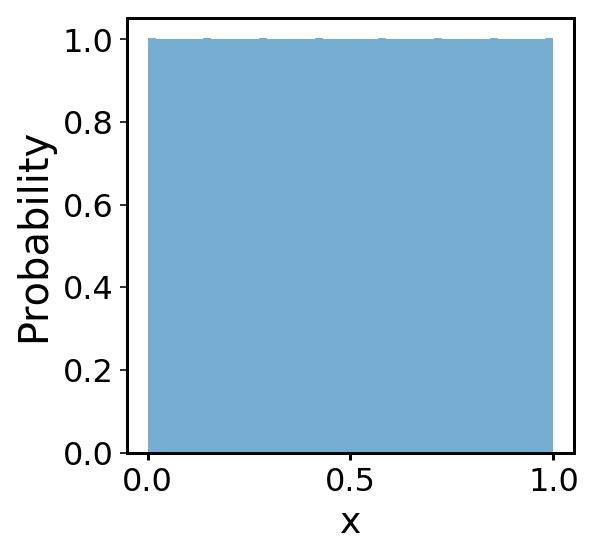

In [17]:
fig, ax =plt.subplots(figsize=(4,4))

ax.hist(x, bins=51, normed=True,alpha=0.6)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('Probability')

OK, that result is kind of boring. We've found that the probability of finding the particle at any point in the box is just a uniform distribution. In other words, there is the same probability of finding the particle at $x=0.2$ as there is of finding the particle at $x=0.6$.

This uniform distribution arises because there are no forces acting on the particle, other than instantaneous repulsion at the walls.

We'll see below that the predictions of quantum mechanics for this system are *very* different!

### Quantum particle in a box

Here, we define a function which returns the value of the particle-in-a-box wavefunction, $\psi_{n}(x)$, in a box-length $L$.

In [18]:
def ParticleInBox(n,x,L):
    return np.sqrt(2/L)*np.sin(n * np.pi * x / L)

Now let's plot the first 4 quantum states for the particle-in-a-box. These have quantum numbers $n=1,2,3,4$.

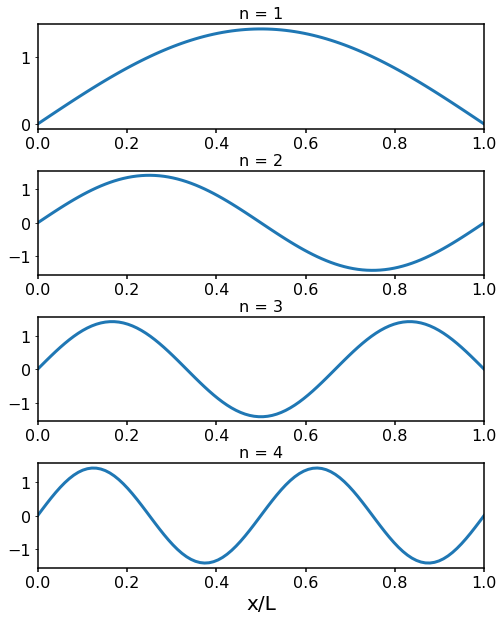

In [7]:
x = np.linspace(0, Length, 100)
y = np.zeros((4,100))
for j in range(0,4):
    y[j,:] = ParticleInBox(j+1,x,Length)

#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(4, 1, sharex='col',figsize=(10,10))
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8,10))
for i in (ax1,ax2,ax3,ax4):
    i.set_xlim([0,1])
plt.subplots_adjust(hspace=0.4)
ax1.plot(x, y[0,:])
ax1.set_title('n = 1')
ax2.plot(x, y[1,:])
ax2.set_title('n = 2')
ax3.plot(x,y[2,:])
ax3.set_title('n = 3')
ax4.plot(x, y[3,:])
ax4.set_title('n = 4')
ax4.set_xlabel('x/L')
plt.show()

From these graphs, we see that the particle-in-a-box wavefunctions are sine waves anchored at $x=0$ and $x=L$.

It's also worth looking what the probability distributions look like for these wavefunctions; these are shown in the following graphs for the same 4 quantum states.

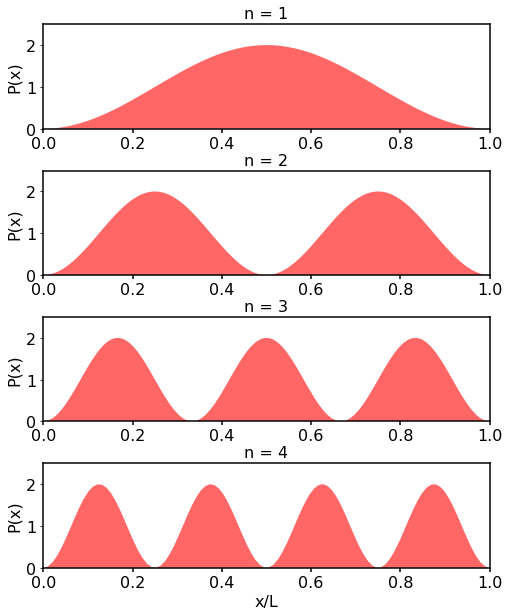

In [8]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8,10))
plt.subplots_adjust(hspace=0.4)
for i in (ax1,ax2,ax3,ax4):
    i.set_xlim([0,1])
    i.set_ylim([0,2.5])
    i.set_ylabel('P(x)',fontsize=16)
ax1.fill(x, y[0,:]**2,'r',alpha=0.6)
ax1.set_title('n = 1',fontsize=16)
ax2.fill(x, y[1,:]**2,'r',alpha=0.6)
ax2.set_title('n = 2',fontsize=16)
ax3.fill(x,y[2,:]**2,'r',alpha=0.6)
ax3.set_title('n = 3',fontsize=16)
ax4.fill(x, y[3,:]**2,'r',alpha=0.6)
ax4.set_title('n = 4',fontsize=16)
ax4.set_xlabel('x/L',fontsize=16)
plt.show()

We see an interesting phenomenon here. As we increase the quantum number $n$, we see an increase in the number of points at which the probability $P(x)$ is $zero$. These special points are called $nodes$; there is no probability that the particle will ever be observed at a node, no matter how many times we measure the position.